### 2.1. Practical Task: Text processing, feature extraction and representation by using both TF and TF-IDF schemes

In [1]:
import pandas as pd
from nltk import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.tokenize.casual import casual_tokenize



C:\Users\marya\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
file = pd.read_csv('Exam_MB210_NLP.csv')
file

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [3]:
file.loc[:,'id']

0        19995
1          285
2       206647
3        49026
4        49529
         ...  
4798      9367
4799     72766
4800    231617
4801    126186
4802     25975
Name: id, Length: 4803, dtype: int64

In [4]:
file.loc[:,['id','original_title']]

,id,original_title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter
...,...,...
4798,9367,El Mariachi
4799,72766,Newlyweds
4800,231617,"Signed, Sealed, Delivered"
4801,126186,Shanghai Calling


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [6]:
file.iloc[:,[4,5]]

,keywords,original_language
0,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en
1,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en
2,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en
3,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en
4,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en
...,...,...
4798,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es
4799,[],en
4800,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en
4801,[],en


array([[<AxesSubplot: title={'center': 'vote_average'}>]], dtype=object)

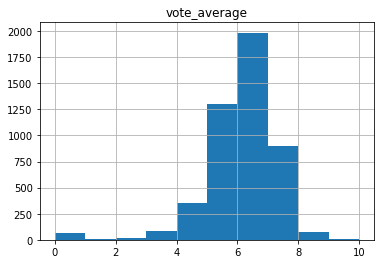

In [7]:
file.hist('vote_average')

array([[<AxesSubplot: title={'center': 'runtime'}>]], dtype=object)

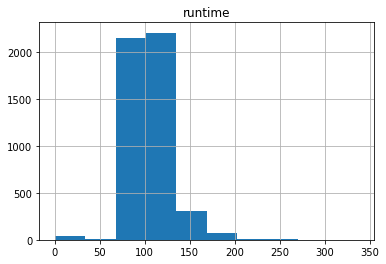

In [8]:
file.hist('runtime')

In [9]:
file['description'] = file['tagline'] + file['overview']

In [10]:
file

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Enter the World of Pandora.In the 22nd century...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"At the end of the world, the adventure begins...."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A Plan No One EscapesA cryptic message from Bo...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Legend EndsFollowing the death of District...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Lost in our world, found in another.John Carte..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,"He didn't come looking for trouble, but troubl..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,A newlywed couple's honeymoon is upended by th...
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Fron

In [11]:
file.loc[:,['description']]

,description
0,Enter the World of Pandora.In the 22nd century...
1,"At the end of the world, the adventure begins...."
2,A Plan No One EscapesA cryptic message from Bo...
3,The Legend EndsFollowing the death of District...
4,"Lost in our world, found in another.John Carte..."
...,...
4798,"He didn't come looking for trouble, but troubl..."
4799,A newlywed couple's honeymoon is upended by th...
4800,NaN
4801,A New Yorker in ShanghaiWhen ambitious New Yor...


In [12]:
file['description'].dropna(inplace=True)
file['description'] = file['description'].astype(str)
file.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Enter the World of Pandora.In the 22nd century...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"At the end of the world, the adventure begins...."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A Plan No One EscapesA cryptic message from Bo...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Legend EndsFollowing the death of District...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Lost in our world, found in another.John Carte..."


## Text processing:

In [13]:
file['lower_case'] = file['description'].astype(str).str.lower()
file.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description,lower_case
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Enter the World of Pandora.In the 22nd century...,enter the world of pandora.in the 22nd century...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"At the end of the world, the adventure begins....","at the end of the world, the adventure begins...."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A Plan No One EscapesA cryptic message from Bo...,a plan no one escapesa cryptic message from bo...


## Tokenizing

In [14]:
regexp = RegexpTokenizer('\w+')

file['Column_token']=file['description'].apply(regexp.tokenize)
file.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,description,lower_case,Column_token
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Enter the World of Pandora.In the 22nd century...,enter the world of pandora.in the 22nd century...,"[Enter, the, World, of, Pandora, In, the, 22nd..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"At the end of the world, the adventure begins....","at the end of the world, the adventure begins....","[At, the, end, of, the, world, the, adventure,..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A Plan No One EscapesA cryptic message from Bo...,a plan no one escapesa cryptic message from bo...,"[A, Plan, No, One, EscapesA, cryptic, message,..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Legend EndsFollowing the death of District...,the legend endsfollowing the death of district...,"[The, Legend, EndsFollowing, the, death, of, D..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Lost in our world, found in another.John Carte...","lost in our world, found in another.john carte...","[Lost, in, our, world, found, in, another, Joh..."


## Stop Words

In [15]:
stop_words = nltk.corpus.stopwords.words('english')
file['Column_SW'] = file['Column_token'].apply(lambda x: [item for item in x if item not in stop_words])
file.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,description,lower_case,Column_token,Column_SW
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Enter the World of Pandora.In the 22nd century...,enter the world of pandora.in the 22nd century...,"[Enter, the, World, of, Pandora, In, the, 22nd...","[Enter, World, Pandora, In, 22nd, century, par..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"At the end of the world, the adventure begins....","at the end of the world, the adventure begins....","[At, the, end, of, the, world, the, adventure,...","[At, end, world, adventure, begins, Captain, B..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,A Plan No One EscapesA cryptic message from Bo...,a plan no one escapesa cryptic message from bo...,"[A, Plan, No, One, EscapesA, cryptic, message,...","[A, Plan, No, One, EscapesA, cryptic, message,..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Legend EndsFollowing the death of District...,the legend endsfollowing the death of district...,"[The, Legend, EndsFollowing, the, death, of, D...","[The, Legend, EndsFollowing, death, District, ..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Lost in our world, found in another.John Carte...","lost in our world, found in another.john carte...","[Lost, in, our, world, found, in, another, Joh...","[Lost, world, found, another, John, Carter, wa..."


## Removing

In [16]:
file['Column_remove']=file['description'].str.replace('\W', ' ', regex=True)
file.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,description,lower_case,Column_token,Column_SW,Column_remove
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Enter the World of Pandora.In the 22nd century...,enter the world of pandora.in the 22nd century...,"[Enter, the, World, of, Pandora, In, the, 22nd...","[Enter, World, Pandora, In, 22nd, century, par...",Enter the World of Pandora In the 22nd century...
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"At the end of the world, the adventure begins....","at the end of the world, the adventure begins....","[At, the, end, of, the, world, the, adventure,...","[At, end, world, adventure, begins, Captain, B...",At the end of the world the adventure begins ...
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,A Plan No One EscapesA cryptic message from Bo...,a plan no one escapesa cryptic message from bo...,"[A, Plan, No, One, EscapesA, cryptic, message,...","[A, Plan, No, One, EscapesA, cryptic, message,...",A Plan No One EscapesA cryptic message from Bo...
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Legend EndsFollowing the death of District...,the legend endsfollowing the death of district...,"[The, Legend, EndsFollowing, the, death, of, D...","[The, Legend, EndsFollowing, death, District, ...",The Legend EndsFollowing the death of District...
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Lost in our world, found in another.John Carte...","lost in our world, found in another.john carte...","[Lost, in, our, world, found, in, another, Joh...","[Lost, world, found, another, John, Carter, wa...",Lost in our world found in another John Carte...


# Tfidf

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

n_samples = 4803
n_features = 500
n_components =10
n_top_words = 6
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.8, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(file.description)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [20]:
print(tfidf_feature_names)

['000', 'accident', 'accidentally', 'action', 'adventure', 'affair', 'age', 'agent', 'ago', 'alien', 'alive', 'america', 'american', 'ancient', 'angeles', 'apart', 'army', 'arrives', 'art', 'attack', 'attempt', 'attempts', 'away', 'baby', 'bad', 'band', 'based', 'battle', 'beautiful', 'begin', 'beginning', 'begins', 'believe', 'believes', 'ben', 'best', 'better', 'big', 'black', 'blood', 'body', 'bond', 'book', 'born', 'boss', 'boy', 'boyfriend', 'break', 'bring', 'brings', 'british', 'brother', 'brothers', 'business', 'california', 'called', 'captain', 'car', 'career', 'case', 'caught', 'century', 'chance', 'change', 'changes', 'characters', 'charlie', 'child', 'childhood', 'children', 'christmas', 'cia', 'city', 'class', 'close', 'college', 'come', 'comedy', 'comes', 'coming', 'company', 'control', 'cop', 'country', 'couple', 'courage', 'crash', 'creatures', 'crew', 'crime', 'criminal', 'cross', 'danger', 'dangerous', 'danny', 'dark', 'daughter', 'david', 'day', 'days', 'dead', 'dead

In [22]:
print(tfidf[0])

  (0, 9)	0.5746346048723071
  (0, 304)	0.48813487375860615
  (0, 61)	0.5659777707300175
  (0, 493)	0.3334495148345498


In [23]:
sample = 150
print(file.description [sample])

Same Planet. New Scum.Kay and Jay reunite to provide our best, last and only line of defense against a sinister seductress who levels the toughest challenge yet to the MIB's untarnished mission statement – protecting Earth from the scum of the universe. It's been four years since the alien-seeking agents averted an intergalactic disaster of epic proportions. Now it's a race against the clock as Jay must convince Kay – who not only has absolutely no memory of his time spent with the MIB, but is also the only living person left with the expertise to save the galaxy – to reunite with the MIB before the earth submits to ultimate destruction.


## 2.2. Practical Task: Topic modelling

## LDA

In [24]:
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
lda_model = LatentDirichletAllocation(n_components)
topics = lda_model.fit_transform(tfidf)

top_terms = 20
TOTAL_TOPICS = 20
vocabulary = np.array(tfidf_vectorizer.get_feature_names())
topic_terms = lda_model.components_

In [25]:
topic_key_term_idxs = np.argsort(-np.absolute(topic_terms), axis=1)[:, :top_terms]
topic_keyterms = vocabulary[topic_key_term_idxs]


print(topic_keyterms[0])

['town' 'new' 'girl' 'small' 'life' 'friend' 'father' 'man' 'little' 'old'
 'boy' 'young' 'party' 'school' 'big' 'day' 'friends' 'comes' 'form'
 'world']


In [26]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=2,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tfidf)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=2, random_state=0)

In [27]:
import matplotlib.pyplot as plt

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 4, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    # plt.show()
    plt.savefig('topics.png')
    


[[ 0.57007929  0.144983    0.50887721 ...  0.91694355  0.12866693
   6.9888421 ]
 [12.16527353 14.28315438  9.7522674  ... 40.54861752 37.21798138
  72.49303053]
 [ 0.12623384  0.12953056  0.17334527 ...  0.1564327   0.16041162
   0.21898054]
 ...
 [ 0.16328028  1.49628087  0.7716831  ... 12.73276069  3.07499845
   8.85203875]
 [ 0.126358    0.14632703  0.13087134 ...  0.14087003  0.12597188
   0.16709728]
 [ 0.14388509  0.19629568  0.23933221 ...  0.75975926  0.16202837
   2.5599138 ]]


IndexError: index 8 is out of bounds for axis 0 with size 8

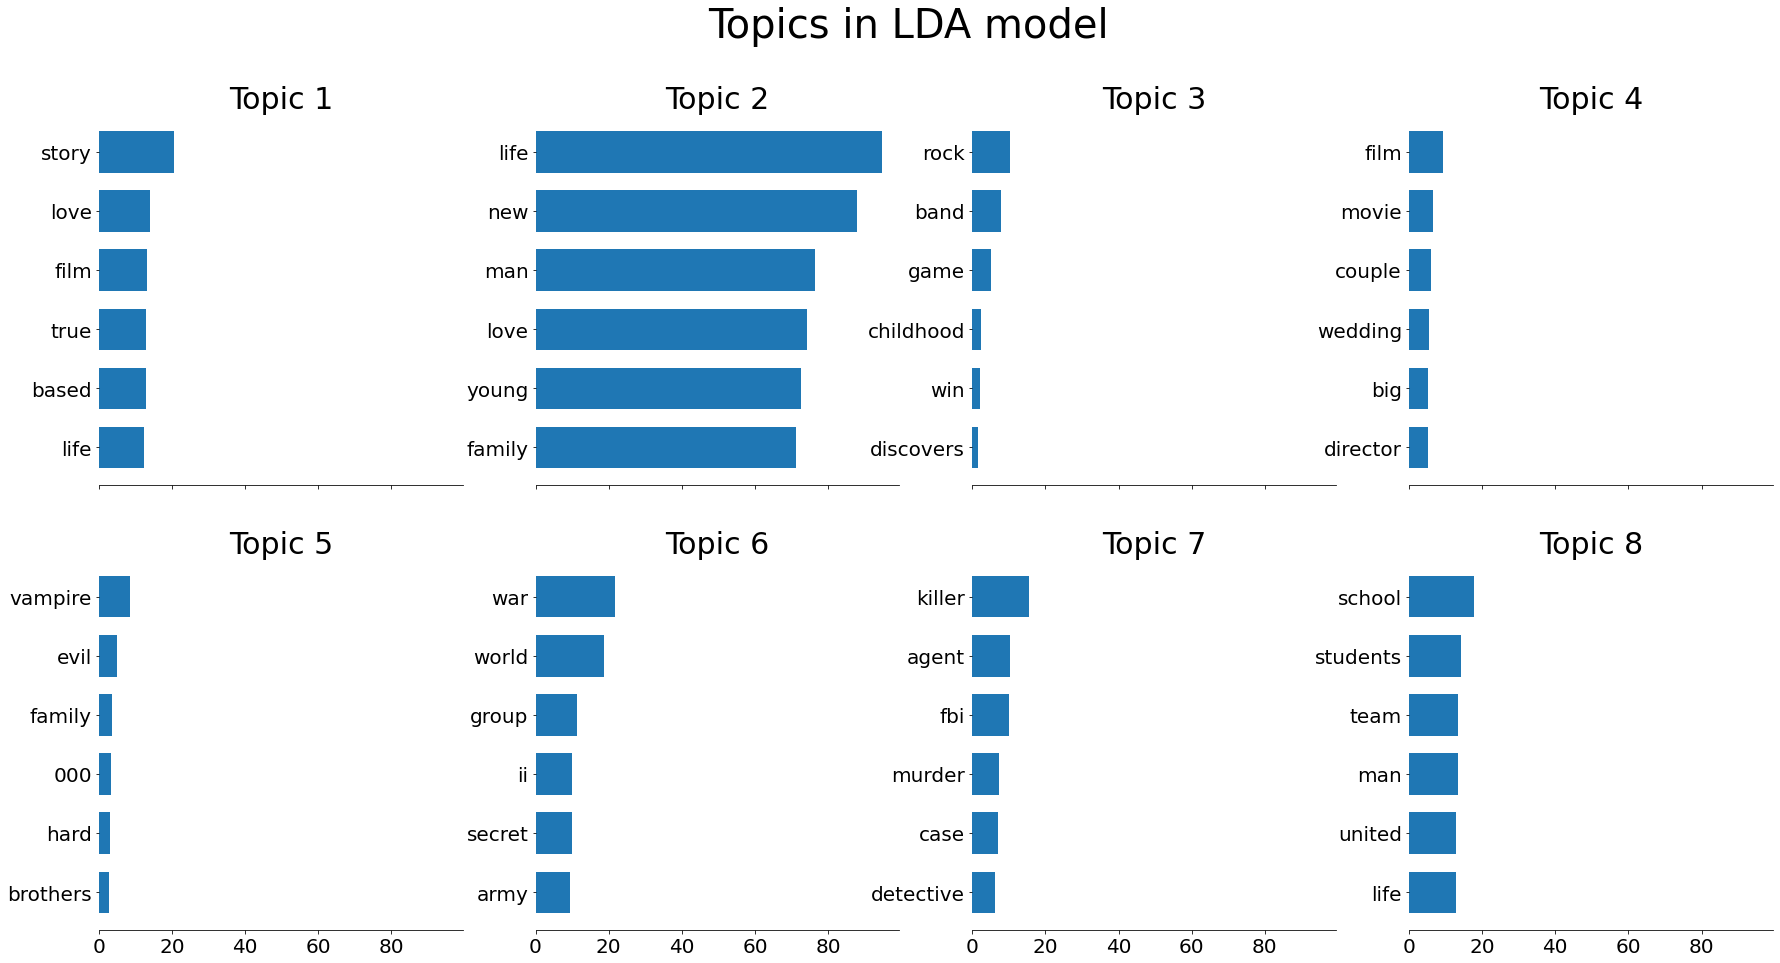

In [28]:
print(lda.components_)
%matplotlib inline
plot_top_words(lda, tfidf_feature_names, n_top_words, "Topics in LDA model")

## LDIA

In [83]:
from sklearn.decomposition import LatentDirichletAllocation
LDiA = LatentDirichletAllocation(n_components=5)
from datetime import datetime
start = datetime.now()
lda_matrix = LDiA.fit_transform(tfidf)

end = datetime.now()
print('time spent:',end-start)

time spent: 0:00:15.062448


In [71]:
lda_components = LDiA.components_
lda_matrix.shape

(4803, 5)

In [70]:
lda_components.shape

(5, 500)

In [72]:
topics = []

for index, component in enumerate(lda_components):
    zipped = zip(vocabulary, component)
    top_terms_key = sorted(zipped, key = lambda t: t[1], reverse=True)[:13]
    top_terms_list = list(dict(top_terms_key).keys())
    topics.append(top_terms_list)
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['story', 'love', 'life', 'world', 'young', 'man', 'true', 'woman', 'new', 'family', 'set', 'time', 'father']
Topic 1:  ['nan', 'art', 'student', 'famous', 'kid', 'jack', 'director', 'attempts', 'rise', 'hell', 'thought', 'bond', 'realizes']
Topic 2:  ['family', 'life', 'new', 'man', 'love', 'friends', 'school', 'mother', 'gets', 'town', 'young', 'high', 'father']
Topic 3:  ['world', 'life', 'new', 'school', 'way', 'time', 'young', 'group', 'space', 'save', 'future', 'begins', 'help']
Topic 4:  ['world', 'war', 'evil', 'battle', 'team', 'new', 'fight', 'man', 'earth', 'army', 'stop', 'group', 'deadly']


In [76]:
lda_matrix[5]

array([0.80246175, 0.04705955, 0.04887133, 0.04991357, 0.05169379])

In [80]:
file.description[5]

'The battle within.The seemingly invincible Spider-Man goes up against an all-new crop of villain – including the shape-shifting Sandman. While Spider-Man’s superpowers are altered by an alien organism, his alter ego, Peter Parker, deals with nemesis Eddie Brock and also gets caught up in a love triangle.'